In [2]:
# Example from Programming Collective Intelligence, Chapter 7

### Modelling Zillow home prices ###

In [3]:
import xml.dom.minidom
import urllib2
from treepredict import *

zwskey = "X1-ZWz1chwxis15aj_9skq6"

def getaddressdata(address, city):
    print "Getting data for %s" % address
    escad = address.replace(' ', '+')
    url = 'http://www.zillow.com/webservice/GetDeepSearchResults.htm?'
    url += 'zws-id=%s&address=%s&citystatezip=%s' % (zwskey, escad, city)
    doc = xml.dom.minidom.parseString(urllib2.urlopen(url).read())
    code = doc.getElementsByTagName('code')[0].firstChild.data
    if code != '0': return None
    if 1:
        try:
            zipcode = doc.getElementsByTagName('zipcode')[0].firstChild.data
            use = doc.getElementsByTagName('useCode')[0].firstChild.data
            year = doc.getElementsByTagName('yearBuilt')[0].firstChild.data
            sqft = doc.getElementsByTagName('finishedSqFt')[0].firstChild.data
            bath = doc.getElementsByTagName('bathrooms')[0].firstChild.data
            bed = doc.getElementsByTagName('bedrooms')[0].firstChild.data
            rooms = doc.getElementsByTagName('totalRooms')[0].firstChild.data
            el = doc.getElementsByTagName('amount')[0].firstChild
            if el is None:
                price = 0.0
            else:
                price = el.data
        except IndexError, e:
            return None
    else:
        return None
    return (zipcode, use, int(year), float(bath), int(bed), int(rooms), int(price))


def getpricelist():
    l1 = []
    for line in file('addresslist.txt'):
        data = getaddressdata(line.strip(), 'Cambridge,MA')
        if data is not None:
            l1.append(data)
    return l1

Build decision tree:

In [4]:
housedata = getpricelist()
housetree = buildtree(housedata, scoref=variance)

Getting data for 6 Washington
Getting data for 21 Manassas
Getting data for 280 Pearl
Getting data for 55 Ellery
Getting data for 50 Follen
Getting data for 51 Granite
Getting data for 992 Memorial
Getting data for 83 Trowbridge
Getting data for 1 Dana
Getting data for 45 Regent
Getting data for 90 Alpine
Getting data for 21 Francis
Getting data for 112 Avon Hill
Getting data for 9 Bellevue
Getting data for 4 Blanchard Rd
Getting data for 34 Shea
Getting data for 5 Fountain
Getting data for 14 Marcella
Getting data for 39 Saint Saveur
Getting data for 35 Pemberton
Getting data for 46 Shepard
Getting data for 31 Market
Getting data for 99 Howard
Getting data for 88 Pearl
Getting data for 208 Western
Getting data for 285 Windsor
Getting data for 26 Cambridgepark
Getting data for 211 Erie
Getting data for 129 Franklin
Getting data for 27 Gurney
Getting data for 149 Prospect
Getting data for 27 Linnaean
Getting data for 20 Dudley
Getting data for 60 Otis St
Getting data for 130 Mount Aubur

Draw generated decision tree:

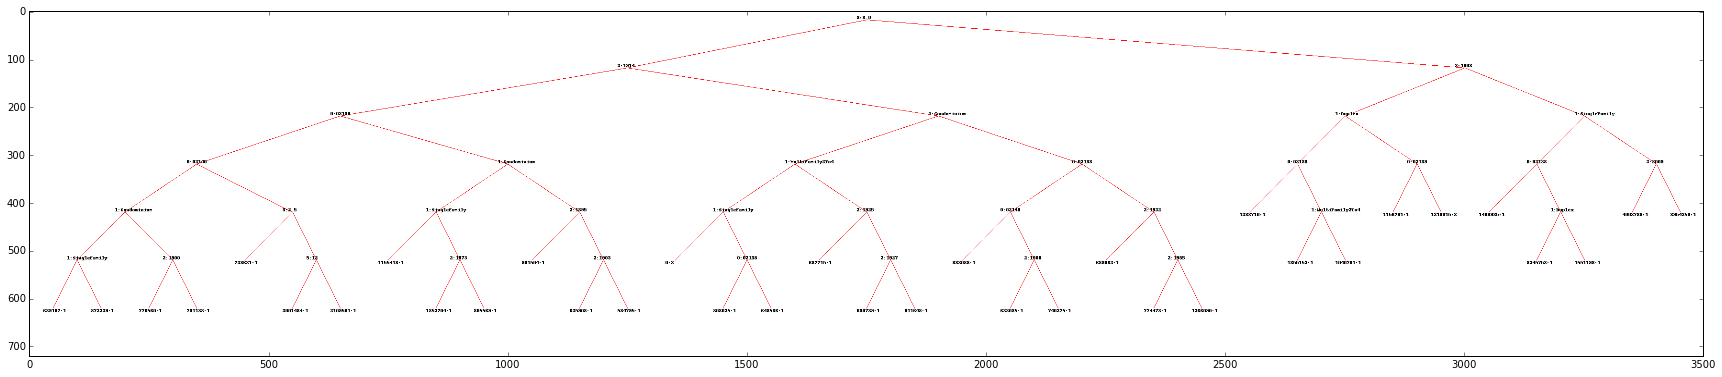

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

img = drawtree(housetree)
fig2 = plt.figure(figsize = (30,60))
ax3 = fig2.add_subplot(111)
ax3.imshow(img)
plt.show()
img.save('housetree.jpg', 'JPEG')